# Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input, Activation
from tensorflow.keras.utils import normalize, to_categorical

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
mist_data = mnist
(x_train, y_train), (x_test, y_test) = mist_data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

I have in training data 60k image & in testing 10k image

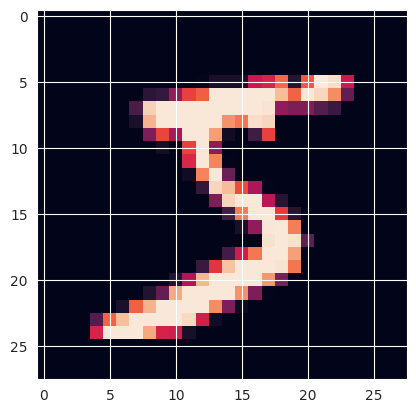

In [4]:
# show image
plt.imshow(x_train[0])

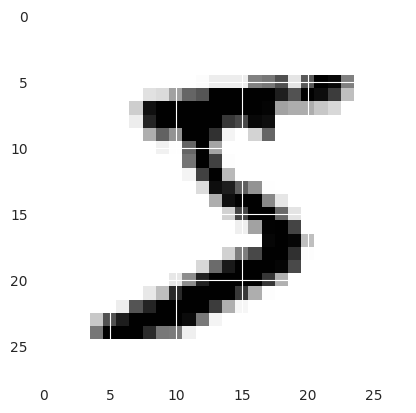

In [5]:
# If we want to visualize the first image from the training set as a binary image
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

# Normalization

In [6]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

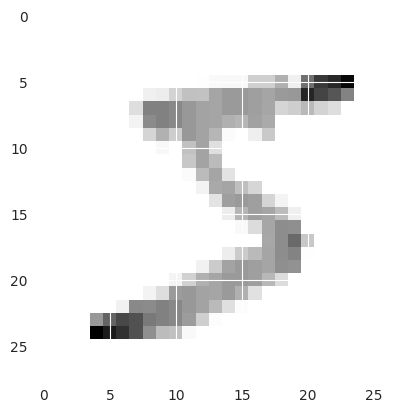

In [7]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

# Resize Images
Now , Resize of every images 28*28 dimension

In [8]:
image_size = 28
x_train = np.array(x_train).reshape(-1, image_size, image_size, 1)   # for traing images
x_test = np.array(x_test).reshape(-1, image_size, image_size, 1)     # for testing images

In [9]:
print("Training Sample Dimension: " ,x_train.shape)
print("Testing Sample Dimension: " ,x_test.shape)

Training Sample Dimension:  (60000, 28, 28, 1)
Testing Sample Dimension:  (10000, 28, 28, 1)


# CNN Model

In [10]:
x_train.shape[1:]

(28, 28, 1)

In [11]:
model = Sequential([
    Input(shape=(x_train.shape[1:])),
    
    Conv2D(64, (3,3)),
    Activation('relu'),  # Activation function is ReLU
    MaxPooling2D((2,2)),  # Max pooling with pool size 2x2
    
    Conv2D(64, (3,3)),
    Activation('relu'),  # Activation function is ReLU
    MaxPooling2D((2,2)),  # Max pooling with pool size 2x2
    
    Conv2D(64, (3,3)),
    Activation('relu'),  # Activation function is ReLU
    MaxPooling2D((2,2)),  # Max pooling with pool size 2x2
    
    Flatten(),
    
    Dense(64),  # Fully connected layer with 64 neurons
    Activation('relu'),  # Activation function is ReLU
    
    Dense(32),  # Fully connected layer with 32 neurons
    Activation('relu'),  # Activation function is ReLU
    
    Dense(10),  # Fully connected layer with 10 neurons (for 10 classes)
    Activation('softmax')  # Activation function is softmax for multi-class classification
])

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.8139 - loss: 0.5531 - val_accuracy: 0.9683 - val_loss: 0.1007
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9717 - loss: 0.0908 - val_accuracy: 0.9786 - val_loss: 0.0770
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9806 - loss: 0.0639 - val_accuracy: 0.9797 - val_loss: 0.0653
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9857 - loss: 0.0472 - val_accuracy: 0.9866 - val_loss: 0.0492
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9890 - loss: 0.0375 - val_accuracy: 0.9858 - val_loss: 0.0468
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9910 - loss: 0.0300 - val_accuracy: 0.9853 - val_loss: 0.0522
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9912 - loss: 0.0268 - val_accuracy: 0.9831 - val_loss: 0.0547
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9935 -

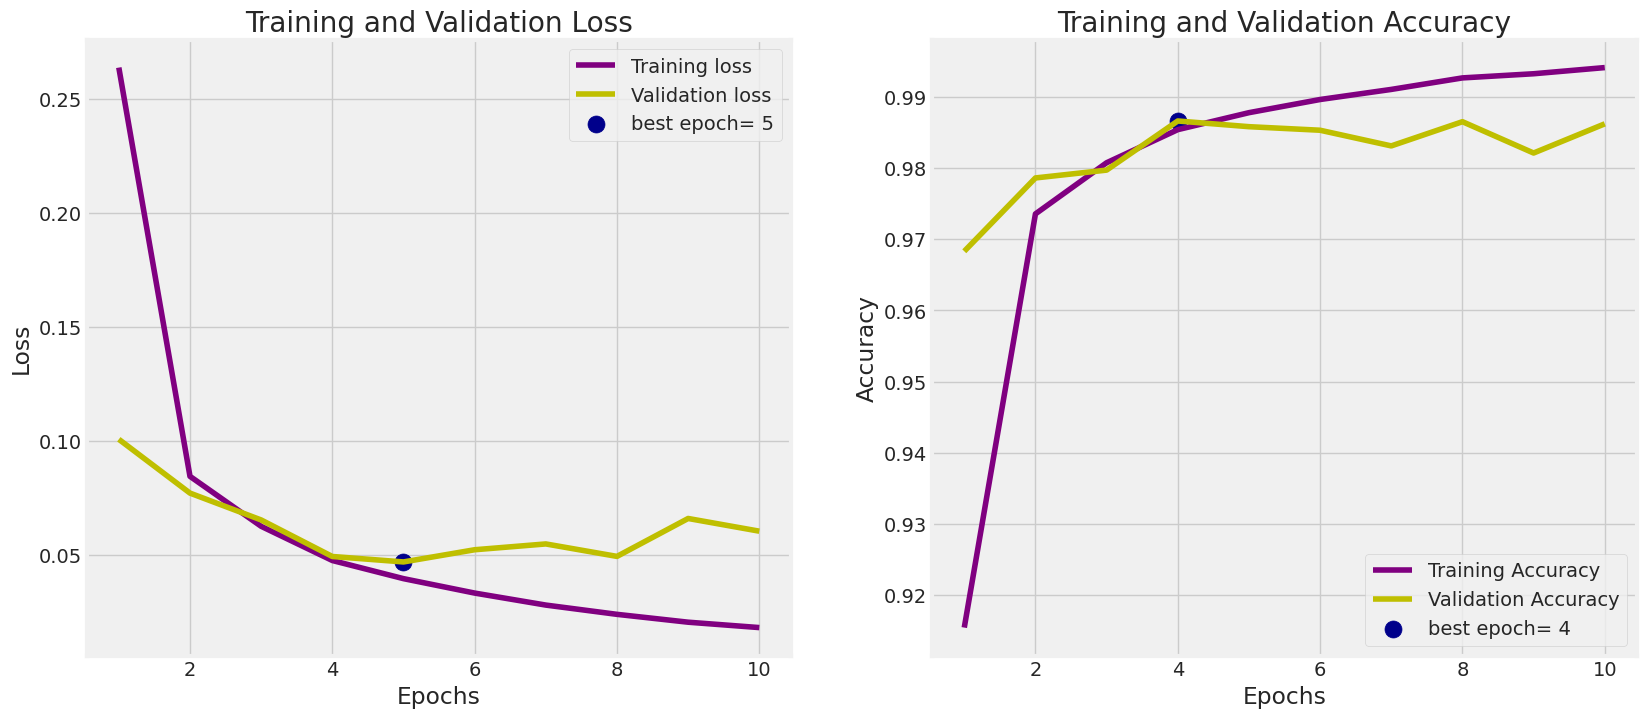

In [14]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'purple', label= 'Training loss')
plt.plot(Epochs, val_loss, 'y', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'darkblue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'purple', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'y', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'darkblue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()



In [15]:
test_score = model.evaluate(x_test, y_test, verbose=1)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9822 - loss: 0.0740
Test Loss:  0.06033727899193764
Test Accuracy:  0.9861999750137329


In [16]:
# Evaluating the model's performance on the test data and obtaining the test loss and accuracy
loss_test, accuracy_test = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9822 - loss: 0.0740


In [17]:
print("Test loss on 10000 test sample ", loss_test)
print("Validation Accuracy on 10000 test sample ", accuracy_test)

Test loss on 10000 test sample  0.06033727899193764
Validation Accuracy on 10000 test sample  0.9861999750137329


In [18]:
# Making predictions using the trained model on the test data (test_x)
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [19]:
pred

array([[8.49082249e-10, 3.78592608e-06, 5.06583274e-05, ...,
        9.99943316e-01, 3.00462499e-09, 3.96297850e-07],
       [1.26799488e-10, 4.22701234e-08, 9.99999821e-01, ...,
        7.12095805e-09, 5.60090932e-11, 8.68948332e-14],
       [9.02488431e-11, 9.99998152e-01, 5.19603191e-07, ...,
        4.68242156e-08, 6.51504948e-08, 1.17625423e-10],
       ...,
       [6.14983596e-14, 9.39215719e-12, 2.26142341e-10, ...,
        2.43570941e-10, 3.79654324e-07, 1.88714377e-08],
       [8.61747829e-09, 2.70650204e-11, 7.40959460e-10, ...,
        1.40962641e-11, 3.47453821e-09, 1.77824351e-08],
       [2.18085661e-05, 4.86501222e-06, 1.53254077e-05, ...,
        2.76769168e-08, 5.97463531e-06, 1.08089935e-05]], dtype=float32)

In [20]:
y_pred = np.argmax(pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
test_y = np.argmax(y_test, axis=1)
test_y

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
cm = confusion_matrix(test_y, y_pred)
cm

array([[ 973,    1,    1,    0,    0,    0,    3,    1,    0,    1],
       [   0, 1132,    0,    0,    2,    1,    0,    0,    0,    0],
       [   3,    0, 1025,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    8,  997,    0,    3,    0,    2,    0,    0],
       [   0,    0,    1,    0,  979,    0,    2,    0,    0,    0],
       [   3,    1,    0,    5,    0,  880,    2,    1,    0,    0],
       [   4,    3,    1,    0,    3,    1,  946,    0,    0,    0],
       [   1,    5,   21,    2,    1,    0,    0,  997,    0,    1],
       [   0,    0,    6,    4,    2,    2,    0,    2,  957,    1],
       [   2,    0,    2,    1,   13,    6,    1,    2,    6,  976]])

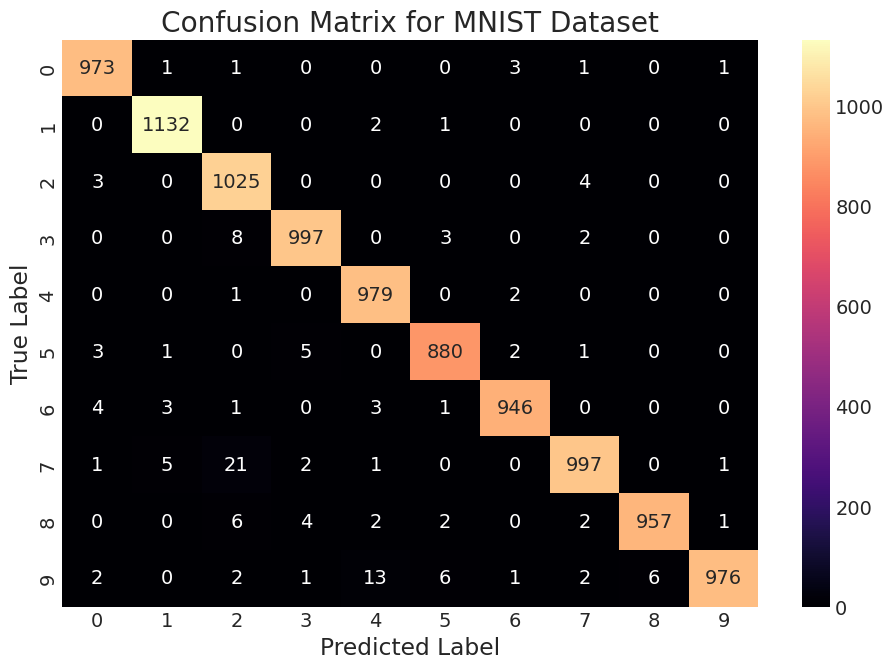

In [47]:
# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

# Adding axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Dataset')

# Display the plot
plt.show()

### Save Model

In [48]:
# Save the model
model.save('HandWritten Digit.h5')